##### <font color='228B63'>By:Vardhaman R P
#####    for data and problem statement statement visit https://github.com/vardhaman-datascience/sales_data_analysis_machine_learning
   ##### please rate if you find it helpful
   ##### THANK YOU

#   

In [921]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sb
import pandas_profiling as pd_prof

In [922]:
data_train=pd.read_csv('E:/Data_Science/Assignments/machine_learning/Assignment1_PGD B7/Assignment1_PGD B7/Train.csv')

In [923]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [924]:
data=data_train.copy()# making the copy for getting inferance of the original data

In [925]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [926]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [927]:
pd_prof.ProfileReport(data)

In [928]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### <font color='brown'>there are significant no of null values lets dont drop it otherwise we ill loose significant data

#   

In [929]:
data_dict=dict(data.dtypes)

In [930]:
data_dict

{'Item_Identifier': dtype('O'),
 'Item_Weight': dtype('float64'),
 'Item_Fat_Content': dtype('O'),
 'Item_Visibility': dtype('float64'),
 'Item_Type': dtype('O'),
 'Item_MRP': dtype('float64'),
 'Outlet_Identifier': dtype('O'),
 'Outlet_Establishment_Year': dtype('int64'),
 'Outlet_Size': dtype('O'),
 'Outlet_Location_Type': dtype('O'),
 'Outlet_Type': dtype('O'),
 'Item_Outlet_Sales': dtype('float64')}

In [931]:
numeric_columns=[]
categorial_columns=[]
for i in data_dict:
    if data_dict[i] in ['float64', 'int64', 'float32', 'int32']:
        numeric_columns.append(i)
    else:
        categorial_columns.append(i)

In [932]:
numeric_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [933]:
categorial_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [934]:
data_cat=data[categorial_columns]

In [935]:
dum=pd.get_dummies(data_cat, prefix='a')
num=data[numeric_columns]
dum.head()

,a_DRA12,a_DRA24,a_DRA59,a_DRB01,a_DRB13,a_DRB24,a_DRB25,a_DRB48,a_DRC01,a_DRC12,...,a_High,a_Medium,a_Small,a_Tier 1,a_Tier 2,a_Tier 3,a_Grocery Store,a_Supermarket Type1,a_Supermarket Type2,a_Supermarket Type3
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


# lets do EDA  

# Numeric columns 

In [936]:
num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


### <font color='green'> item_Weight v/s Item_Outlet_Sales </font>

### <font color='brown'>item weight:</font> is the weight of each item and lets see how it is dependent on our target variable?                                    is it significant in calculating the item_ouutlet_sales?                                               

In [937]:
?sb.scatterplot

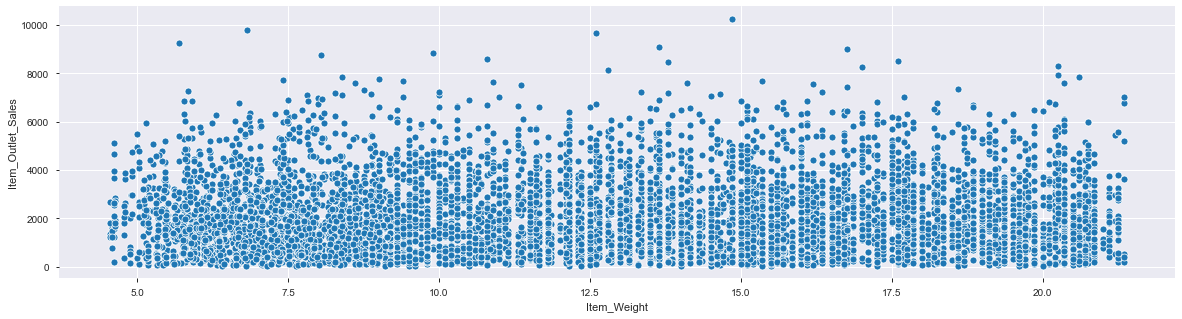

In [938]:
plt.figure(figsize=(20,5))
sb.scatterplot(num['Item_Weight'],num['Item_Outlet_Sales'])


### <font color='brown'>Conlusion: By this we can conclude that there is no much pattern or corelation between item_outlet_sales and item_weight
</font>

#  

### <font color='green'> Item_Visibility v/s Item_Outlet_Sales </font>

### <font color='brown'> item_visibility:</font> item_visibility infers that if the value is less , than it is more visible and easily accessible for the customer:

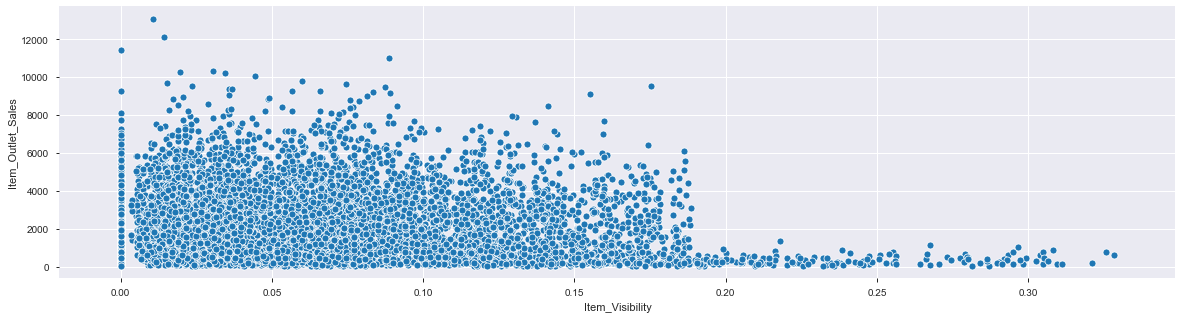

In [939]:
plt.figure(figsize=(20,5))
sb.scatterplot(num['Item_Visibility'],num['Item_Outlet_Sales'])

### <font color='brown'>Conlusion: By this we can conclude that high visible or easily accessible item are more saled compare to less visible that means this attribute makes some inferance to the target variable
</font>

### <font color='green'> Item_MRP v/s Item_Outlet_Sales </font>

### <font color='brown'>ItemMRP:</font> cost of each item

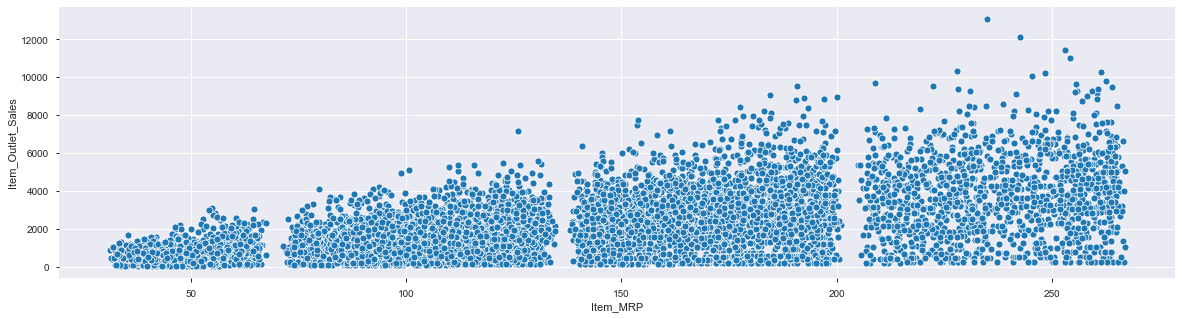

In [940]:
plt.figure(figsize=(20,5))
sb.scatterplot(num['Item_MRP'],num['Item_Outlet_Sales'])

### <font color='brown'>Conlusion:By this we can conclude that high range of Item_MRP has more sales compare to low range of Item_MRP so this attribute also makes some inferance for the target variable
</font>

### <font color='green'>Outlet_Establishment_Year v/s Item_Outlet_Sales

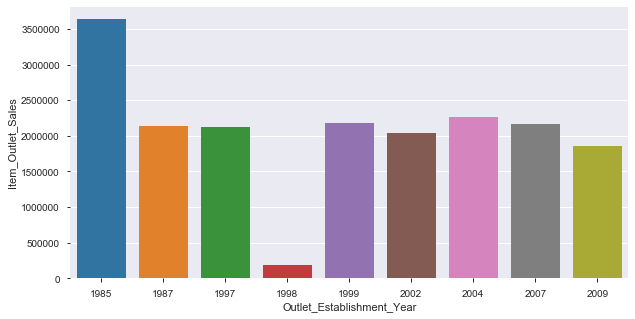

In [941]:
plt.figure(figsize=(10,5))
x=pd.DataFrame(data1.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum()).reset_index()
sb.barplot(x['Outlet_Establishment_Year'],x['Item_Outlet_Sales'])

### <font color='brown'>Conlusion:By this we can conclude that there is no much inferance we can get with respect to outlet eshtablishment year, we can say thiis attribute is less significat</font>

## Categorical columns

In [942]:
data_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


### <font color='green'>Item_Fat_content v/s Item_Outlet_Sales

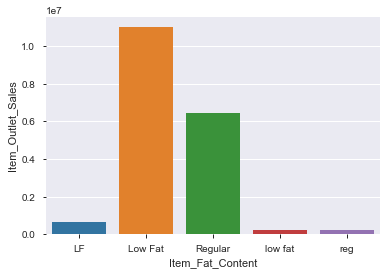

In [944]:
x=pd.DataFrame(data.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum()).reset_index()
sb.barplot(x['Item_Fat_Content'],x['Item_Outlet_Sales'])

#### there are four categories of Item_Fat_content, 'LF' and 'low fat' should infer the same and so Regular and reg

In [945]:
for i in range(len(data['Item_Fat_Content'])):
    if data['Item_Fat_Content'][i]=='LF':
        data['Item_Fat_Content'][i]='Low Fat'
    if data['Item_Fat_Content'][i]=='reg':
        data['Item_Fat_Content'][i]='Regular'
    if data['Item_Fat_Content'][i]=='low fat':
        data['Item_Fat_Content'][i]='Low Fat'
        

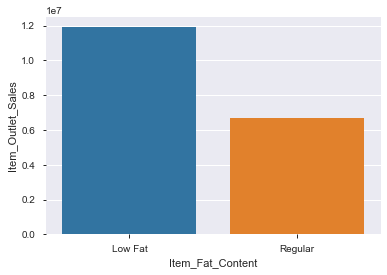

In [946]:
y=pd.DataFrame(data.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum()).reset_index()
sb.barplot(y['Item_Fat_Content'],y['Item_Outlet_Sales'])

### <font color='green'>Item_Type v/s Item_Outlet_Sales

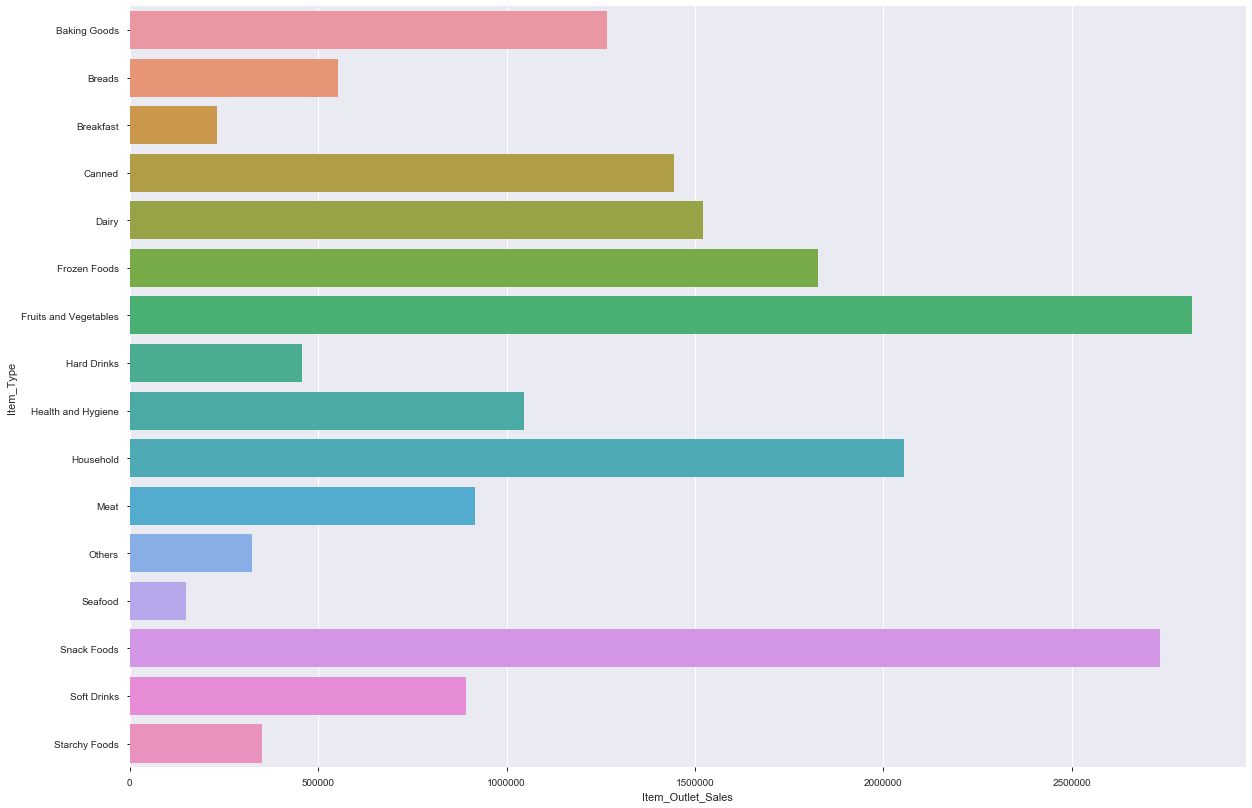

In [947]:
plt.figure(figsize=(20,14))
y=pd.DataFrame(data.groupby(['Item_Type'])['Item_Outlet_Sales'].sum()).reset_index()
sb.barplot(y['Item_Outlet_Sales'],y['Item_Type'])

### <font color='brown'>Conlusion:fruits and vegetables and snacks food constitute more item_outlets_sales and </font>

## <font color='Green'>Outlet_Identifier v/s Item_Outlet_Sales

In [948]:
data.groupby(['Outlet_Identifier','Outlet_Size'])['Outlet_Size'].count()

Outlet_Identifier  Outlet_Size
OUT013             High           932
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT046             Small          930
OUT049             Medium         930
Name: Outlet_Size, dtype: int64

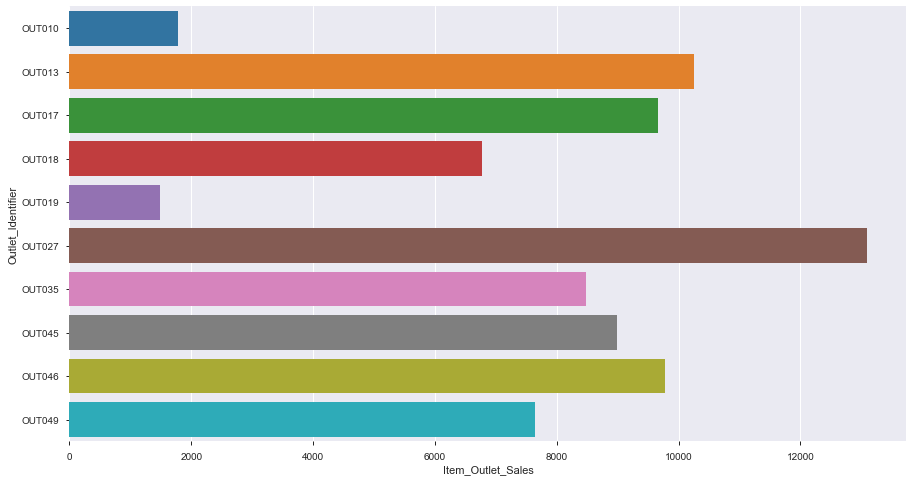

In [949]:
plt.figure(figsize=(15,8))
y=pd.DataFrame(data.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].max()).reset_index()
sb.barplot(y['Item_Outlet_Sales'],y['Outlet_Identifier'])

## <font color='green'>Outlet_Size v/s Item_Outlet_Sales

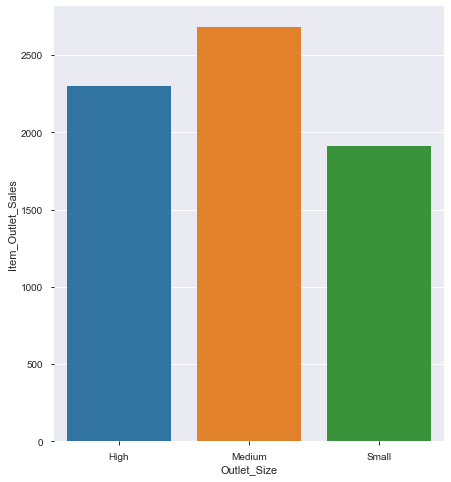

In [950]:
plt.figure(figsize=(7,8))
y=pd.DataFrame(data.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean()).reset_index()
sb.barplot(y['Outlet_Size'],y['Item_Outlet_Sales'])

### <font color='brown'>Conclusion: we can say that medium sized stores have high item_outlet_sales

### <font color='green'>Outlet_Location_Type v/s Item_Outlet_Sales 

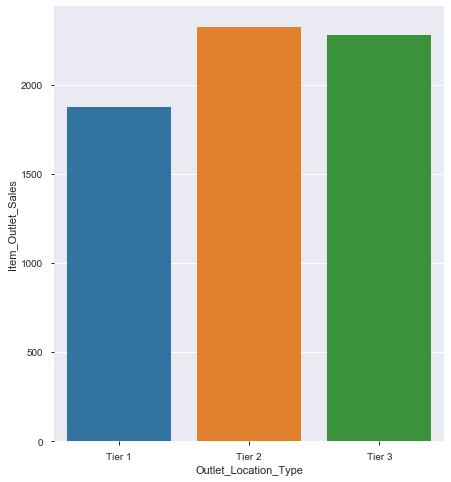

In [951]:
plt.figure(figsize=(7,8))
y=pd.DataFrame(data.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].mean()).reset_index()
sb.barplot(y['Outlet_Location_Type'],y['Item_Outlet_Sales'])

### <font color='brown'>conclusion:Tier 2 cities avg sales are higher than tier 3 and tier 1 cities

### <font color='green'>Outlet_Type v/s Item_Outlet_Sales

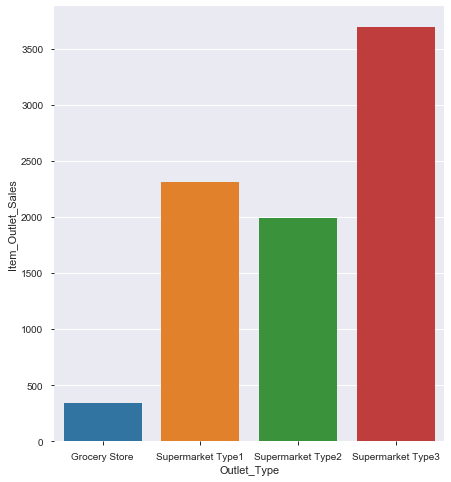

In [952]:
plt.figure(figsize=(7,8))
y=pd.DataFrame(data.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean()).reset_index()
sb.barplot(y['Outlet_Type'],y['Item_Outlet_Sales'])

### <font color="brown">super_market_Type3 has the high average sales

#   

#   

#    

## <font color='blue'> IMPUTTING NULL VALUES

### <font color='C7A810'>Imputing null values of the Item_Weight 

In [953]:
num.isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

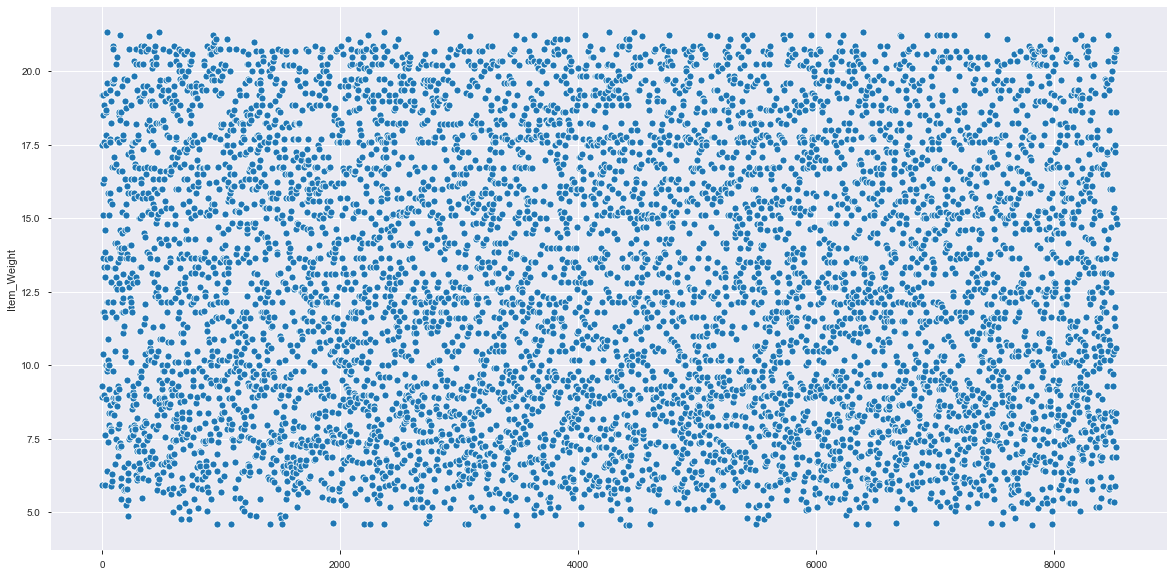

In [954]:
plt.figure(figsize=(20,10))
sb.scatterplot(num.index,num['Item_Weight'])

### <font color='brown'>item_weight data is randomly scatterd

(array([483., 870., 865., 664., 779., 629., 755., 735., 677., 603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <a list of 10 Patch objects>)

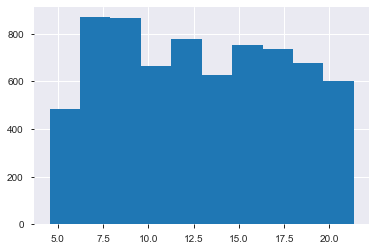

In [955]:
plt.hist(data_train['Item_Weight'])

### <font color='brown'>there is no pattern found in Item weight

###    

In [956]:
data1.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,a_Baking Goods,a_Breads,a_Breakfast,a_Canned,a_Dairy,...,a_High,a_Medium,a_Small,a_Tier 1,a_Tier 2,a_Tier 3,a_Grocery Store,a_Supermarket Type1,a_Supermarket Type2,a_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


### reducing the item_identifier 

In [957]:
ddd=data['Item_Identifier']
hh=[]
for i in ddd:
    hh.append("".join(list(i)[:3]))
data['Item_Identifier']=hh
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [958]:
item_mean=data.groupby(['Item_Identifier'])['Item_Weight'].mean()

In [959]:
item_mean.head()

Item_Identifier
DRA    12.704118
DRB    11.022500
DRC    10.954063
DRD    11.590000
DRE    12.889545
Name: Item_Weight, dtype: float64

### <font color='green'>Replacing the null values by that category mean of item_identifier

In [960]:
for i in range(len(data['Item_Weight'])):
    if pd.isnull(data['Item_Weight'].iloc[i]):
        x=data['Item_Identifier'][i]
        data['Item_Weight'].iloc[i]=item_mean[x]   

In [961]:
data['Item_Weight'].isnull().sum()

0

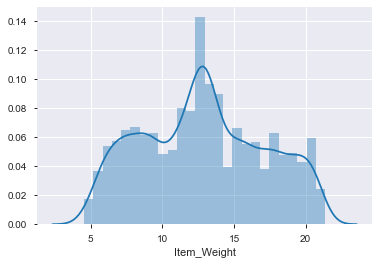

In [962]:
sb.distplot(data['Item_Weight'])

### <font color='C7A810'>Imputing null values of the Item_Size

In [963]:
data.groupby(['Outlet_Identifier','Outlet_Size'])['Outlet_Size'].count()

Outlet_Identifier  Outlet_Size
OUT013             High           932
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT046             Small          930
OUT049             Medium         930
Name: Outlet_Size, dtype: int64

In [964]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [965]:
x=data[['Outlet_Type','Outlet_Size']]
x[x['Outlet_Size']=='Medium']['Outlet_Type'].value_counts()

Supermarket Type3    935
Supermarket Type1    930
Supermarket Type2    928
Name: Outlet_Type, dtype: int64

In [966]:
x=data[['Outlet_Type','Outlet_Size']]
x[x['Outlet_Size']=='High']['Outlet_Type'].value_counts()

Supermarket Type1    932
Name: Outlet_Type, dtype: int64

In [967]:
x=data[['Outlet_Type','Outlet_Size']]
x[x['Outlet_Size']=='Small']['Outlet_Type'].value_counts()

Supermarket Type1    1860
Grocery Store         528
Name: Outlet_Type, dtype: int64

In [968]:
ddd=data[data['Outlet_Type']=='Supermarket Type1']
ddd.groupby(['Outlet_Location_Type','Outlet_Size'])['Outlet_Size'].count()

Outlet_Location_Type  Outlet_Size
Tier 1                Medium         930
                      Small          930
Tier 2                Small          930
Tier 3                High           932
Name: Outlet_Size, dtype: int64

# <font color='Brown'>from above results we came to know that 
#### 1] all Grocery Stores comes under "Small" Type
#### 2] all high sized outlets comes under supermarketType1
#### 3] all supermarketType2 and supermarketType3 are Medium size 
#### 4] amoung the Supermarket Type1 Tier3 got high outlet_size,and Tier2 got only small size

### <font color='14867B'> we ill replace the null values according to the above results

In [969]:
for i in range(len(data['Outlet_Size'])):
    if pd.isnull(data['Outlet_Size'].iloc[i]):
        if data['Outlet_Type'].iloc[i]=='Grocery Store':
            data['Outlet_Size'].iloc[i]='Small'
        elif data['Outlet_Type'].iloc[i]=='Supermarket Type2':
            data['Outlet_Size'].iloc[i]='Medium'
        elif data['Outlet_Type'].iloc[i]=='Supermarket Type3':
            data['Outlet_Size'].iloc[i]='Medium'
        elif data['Outlet_Type'].iloc[i]=='Supermarket Type1':
            if data['Outlet_Location_Type'].iloc[i]=='Tier 1':
                    data['Outlet_Size'].iloc[i]='Medium'# being  mode is medium 
            elif data['Outlet_Location_Type'].iloc[i]=='Tier 2':
                data['Outlet_Size'].iloc[i]='Small'
            elif data['Outlet_Location_Type'].iloc[i]=='Tier 3':
                data['Outlet_Size'].iloc[i]='High'
        

In [970]:
data['Outlet_Size'].isnull().sum()

0

In [971]:
data1=data.copy() # making a copy of data so that we can modify the columns

In [972]:
data1=data.drop(['Item_Identifier','Item_Fat_Content'],axis=1)

### <font color='Brown'>we are droping this column because these are insgnificant columns as in EDA above

In [973]:
data1=pd.get_dummies(data1, prefix='a')

#   

In [974]:
data1.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,a_Baking Goods,a_Breads,a_Breakfast,a_Canned,a_Dairy,...,a_High,a_Medium,a_Small,a_Tier 1,a_Tier 2,a_Tier 3,a_Grocery Store,a_Supermarket Type1,a_Supermarket Type2,a_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


## <font color='Voilet'>Model Buliding

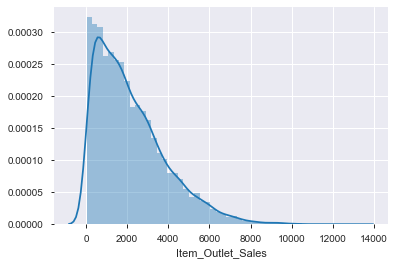

In [975]:
sb.distplot(data['Item_Outlet_Sales'])

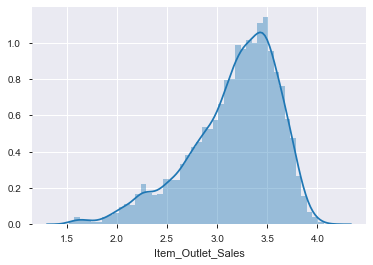

In [978]:
sb.distplot(np.log10(data['Item_Outlet_Sales']))

### <font color='Brown'>As we can observe here that Item_Outlet_Sales is right skewed so it is better we use logarithim transform  but after using the log transformation 

#    

In [1013]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [1024]:
X=data1.drop(['Item_Outlet_Sales','Outlet_Establishment_Year','Item_Weight',],axis=1)
Y=data1[['Item_Outlet_Sales']]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=3)

### <font color='green'>LinearRegression

In [1025]:
reg=LinearRegression(normalize=True)   
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [1026]:
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test1,y_pred1))
rmse=np.sqrt(mean_squared_error(y_pred,y_test))
r2=r2_score(y_test,y_pred)
print('rmse=',rmse)

rmse= 1086.2943467827317


### <font color='brown'>rmse= 1086.2943467827317</font>

#   

### <font color='green'>RidgeRegression

In [1027]:
alpha_list=[0.01,0.05,0.5,5]
for i in alpha_list:
    ridgeReg=Ridge(alpha=i,normalize=True)
    ridgeReg.fit(x_train,y_train)
    rpred=ridgeReg.predict(x_test)
    from sklearn.metrics import r2_score,mean_squared_error
    rmse=np.sqrt(mean_squared_error(rpred,y_test))
    print('Alpha=',i)
    print('rmse=',rmse)
    print(' ')

Alpha= 0.01
rmse= 1087.0051018563809
 
Alpha= 0.05
rmse= 1090.587279229989
 
Alpha= 0.5
rmse= 1161.7271328978459
 
Alpha= 5
rmse= 1498.8473846509053
 


### <font color='brown'>rmse= 1087.0051018563809</font>

#  

### <font color='green'>lassoRegression

In [1030]:
for i in alpha_list:
    lassoReg=Lasso(alpha=i,normalize=True)
    lassoReg.fit(x_train,y_train)
    pred=lassoReg.predict(x_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    print('alpha',i)
    print('rmse=',rmse)   
    print(' ')

alpha 0.01
rmse= 1086.0913215031712
 
alpha 0.05
rmse= 1085.3867535491977
 
alpha 0.5
rmse= 1089.838137966903
 
alpha 5
rmse= 1336.9914452176147
 


### <font color='brown'>rmse= 1085.3867535491977</font>

#   

### <font color='green'>xgboost

In [1029]:
from xgboost import XGBRegressor

xgb=XGBRegressor(n_estimators=100,random_state=0)

xgb.fit(x_train,y_train)
y_predict=xgb.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_predict,y_test))
print('rmse=',rmse)
#accuracy_score(y_test,y_predict)*100

[12:00:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rmse= 1029.4116636903905


### <font color='brown'>rmse= 1029.4116636903905</font>

## <font color ='57890D'>Final Report:

### * <font color='0B573A'> 'Item_Outlet_Sales','Outlet_Establishment_Year','Item_Weight','Item_Visibility' are the inignificant columns to predict the item-outlet sales,as discussed in the EDA above.

### * <font color='0B573A'> Item_outlet_sales was rightly skewed,so taking the logaritimic transformmation increased the R-sqaured value.

### *<font color='0B573A'> Xgboost model gave the least RMSE(1029.4116636903905) value so this model is selected

### * <font color='0B573A'> predicted values are log-values and should to get the actual value one should take the inverse